# Assignment 8

*(Due Saturday, November 16, 2019 at noon.)*

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

Load your dataset and create at least one visualization involving at least two variables (columns). Explain the relevance of this graph in the Markdown cell below, and use comments to document the code you use to produce it.

In [30]:
drive = pd.read_csv('../dataset/drive.csv', index_col=0)
# Remove unwanted characters from Columns
drive.columns = drive.columns.str.replace("[", "_")
drive.columns = drive.columns.str.replace("]","")
drive.columns = drive.columns.str.replace("/","")
drive.columns = drive.columns.str.replace("%","Pctg")
# Deleting rows where GPS signal in the beginning was lost
drive = drive[drive.Longitude_deg != 0]
# Add column with speed as m_s
drive['Vehicle Speed_m_s'] = drive['Vehicle Speed_kmh']/3.6
# Add column with Acceleration
drive['Acceleration'] = drive['Vehicle Speed_m_s'] - drive['Vehicle Speed_m_s'].shift()
# Add column with distance travelled in that second
drive['Dist_in_s'] = drive['Vehicle Speed_m_s']/1609.344
# Add column with cumulative distance
drive['Cumsum_Dist'] = drive['Dist_in_s'].cumsum()
# Add column with consumption in every second of the drive
drive['kwh'] = -1*(((drive['HV Battery Current_A'] * drive['HV Battery Voltage_V'])/1000)/3600)
#Cumsu of energy consumption
drive['Cumsum_kwh'] = drive['kwh'].cumsum()
# Add column change in Elevation
drive['Change_Elevation'] = drive['Altitude_m'] - drive['Altitude_m'].shift()

,Altitude_m,HV Battery Current_A,HV Battery SOC_Pctg,HV Battery Voltage_V,Is Driving_bool,Latitude_deg,Longitude_deg,OAT_degC,Vehicle Speed_kmh,Vehicle Speed_m_s,Acceleration,Dist_in_s,Cumsum_Dist,kwh,Cumsum_kwh,Change_Elevation
Timestamp(ms),,,,,,,,,,,,,,,,
3500,74.400002,-1.25,33.0,319.00,1,41.489159,-71.521751,10,0,0.000000,NaN,0.000000,0.000000,0.000089,0.000089,NaN
4500,74.400002,-13.75,33.0,318.50,1,41.489159,-71.521751,10,2,0.555556,0.555556,0.000345,0.000345,0.000092,0.000181,0.0
5500,74.400002,-13.75,33.0,318.50,1,41.489159,-71.521751,10,2,0.555556,0.000000,0.000345,0.000690,0.000092,0.000274,0.0
6500,74.400002,-10.75,33.0,318.75,1,41.489159,-71.521751,10,3,0.833333,0.277778,0.000518,0.001208,0.000092,0.000365,0.0
7500,74.400002,-15.50,33.0,318.25,1,41.489159,-71.521751,10,6,1.666667,0.833333,0.001036,0.002244,0.000093,0.000458,0.0


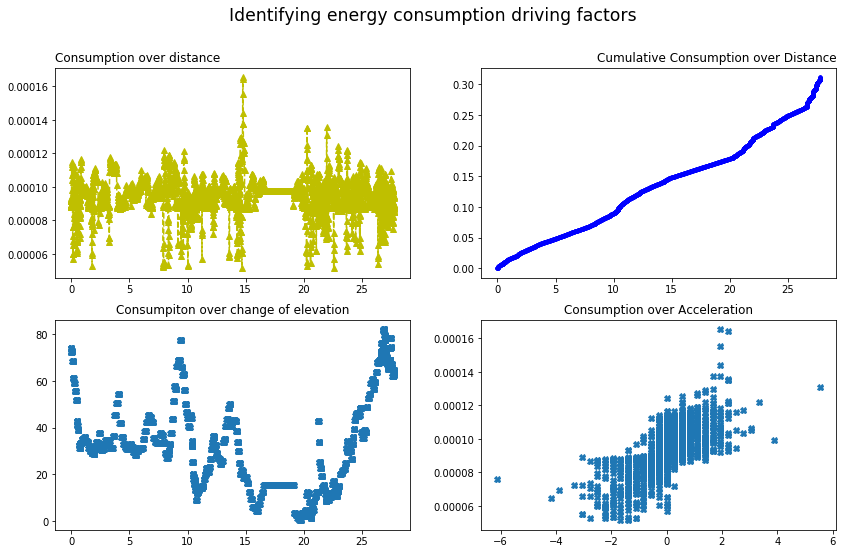

In [39]:
%matplotlib inline
fig, axs = plt.subplots(2, 2, figsize=(14, 8.5))
# Plot of the consumption over distance in a linear way
axs[0][0].plot('Cumsum_Dist', 'kwh', 'y--^', data=drive)
axs[0][0].set_title('Consumption over distance', loc="left")

# Plot of the cumulated consumption over distance travelled on route
axs[0][1].plot('Cumsum_Dist', 'Cumsum_kwh', 'b:.', data=drive)
axs[0][1].set_title("Cumulative Consumption over Distance", loc="right")

# Plot of the consumption over the change of elevation
axs[1][0].plot('Cumsum_Dist', 'Altitude_m', 'X', data=drive)
axs[1][0].set_title("Consumpiton over change of elevation")

# Plot of the consumption over the acceleration
axs[1][1].plot('Acceleration', 'kwh', 'X', data=drive)
axs[1][1].set_title("Consumption over Acceleration")


plt.suptitle('Identifying energy consumption driving factors', size='xx-large')

plt.show()

## Relevance of the graphs
#### The first graph shows the consumption in every second of the drive over the distance, showing where during the test run the most energy was consumed. The second graph in the upper right corner showed the cumulative consumption over the drive in order to see how constant energy was consumed. 

#### The third graph shows the elevation in m over the drive. It is used to detect patterns or correlations between elevation and consumption showed in figures 1 and 2.

#### The fourth graph is used to see correlations between acceleration and energy consumption in kwh.

